In [1]:
import plotly.graph_objects as go
import networkx as nx

In [2]:
G=nx.random_geometric_graph(200,0.125)

# Aristas

In [6]:
edge_x=[]
edge_y=[]

In [8]:
for e in G.edges():
    x0, y0 = G.nodes[e[0]]['pos']
    x1,y1 = G.nodes[e[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
        

In [13]:
edge_trace=go.Scatter(x=edge_x,y=edge_y,line=dict(width=0.5,color='crimson'),mode='lines' )

# Nodos

In [29]:
node_x=[]
node_y=[]

for n in G.nodes():
    x,y = G.nodes[n]['pos']
    node_x.append(x)
    node_y.append(y)
    
node_trace = go.Scatter(x=node_x,y=node_y,mode='markers',hoverinfo='text',marker=dict(
    showscale=True,colorscale='Jet',reversescale=True,color=[],
    size=10,colorbar=dict(thickness=15, title='Una Grafica',xanchor='left', 
                          titleside='right')),line_width=2)

In [30]:
node_adjacencies=[]
node_text=[]
for node,adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('Grado: '+str(len(adjacencies[1])))
node_trace.marker.color=node_adjacencies
node_trace.text=node_text

In [31]:
fig=go.Figure(data=[edge_trace,node_trace],layout=go.Layout(
                title='Red hecha con plotly',
                titlefont_size=16, showlegend=False,hovermode='closest',margin=dict(b=20,l=5,r=5,t=40),
                 xaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
                yaxis=dict(showgrid=False,zeroline=False,showticklabels=False)
                ))

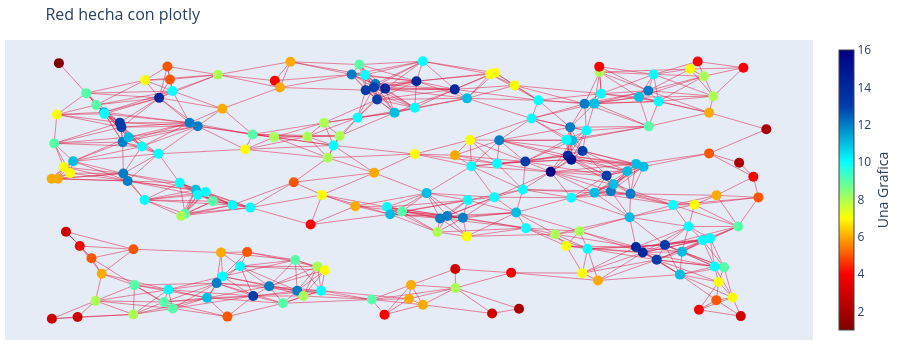

In [32]:
fig.show()